<div style="font-family: 'Courier New', Courier, monospace; font-size: 1.8em; color: #f6f8fa; background-color: #24292e; border: 2px solid #444d56; border-radius: 6px; padding: 10px 20px; margin-top: 20px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
    <span style="font-weight: 600; font-size: 1.1em; letter-spacing: 0.5px; color: #f0f6fc;">1. Notebook Overview</span>
</div>


<div style="font-family: 'Arial', sans-serif; line-height: 1.7; color: #333; max-width: 1000px; margin: auto; padding: 15px;">

  <p style="font-size: 1.2em; margin-bottom: 20px;">
    Welcome to the first notebook in our three-part series! In this section, we’ll dive into datasets for the 
    <strong>RAN</strong>, <strong>Transport (OvS)</strong>, and <strong>Core (UPF)</strong> VNFs. These datasets were gathered by injecting traffic into the VNFs, as illustrated below, and capturing both input and output flows across various resource allocations.
  </p>

  <div align="center" style="margin: 25px 0; padding: 15px; background-color: white; ">
    <img src="images/5GNet.png" alt="vNetRunner Overview" width="400"" />
  </div>

  <p style="font-size: 1.2em; margin-top: 20px;">
    To begin, let’s review the <em><strong>Directory Structure</strong></em> and <em><strong>Data Description</strong></em> sections available in the 
    <a href="https://github.com/sulaimanalmani/net_model_dataset" target="_blank" style="color: #2196F3; text-decoration: none; font-weight: bold;">
      net_model_dataset
    </a> repository.
  </p>
</div>


<div style="font-family: 'Courier New', Courier, monospace; font-size: 1.8em; color: #f6f8fa; background-color: #24292e; border: 2px solid #444d56; border-radius: 6px; padding: 10px 20px; margin-top: 20px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
    <span style="font-weight: 600; font-size: 1.1em; letter-spacing: 0.5px; color: #f0f6fc;">2. Importing the necessary libraries</span>
</div>


In [1]:
%%capture
%load_ext autoreload
%autoreload 2
from data_generator import DataGenerator as DataGenerator
import os
from matplotlib import pyplot as plt
import pandas as pd
import ipywidgets as widgets
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'
from IPython.display import display, HTML
import ipywidgets as widgets
import plotly.graph_objects as go


<div style="font-family: 'Courier New', Courier, monospace; font-size: 1.8em; color: #f6f8fa; background-color: #24292e; border: 2px solid #444d56; border-radius: 6px; padding: 10px 20px; margin-top: 20px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
    <span style="font-weight: 600; font-size: 1.1em; letter-spacing: 0.5px; color: #f0f6fc;">3. Exploring the dataset</span>
</div>


<div style="display: inline-block;">
    <h2 style="font-family: 'Courier New', Courier, monospace; font-size: 1.5em; color: #f0f6fc; background-color: #2d333b; border-left: 4px solid #3F51B5; padding: 8px 15px; border-radius: 4px; margin-top: 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
        3a. Investigating the Files
    </h2>
</div>


In [3]:
# Fill in the datasets based ont the directory structure.
# Hint use the sidebar on the left to navigate to net_model_dataset and explore the subdirectories.
dataset_folders = {
    "RAN dataset": "./net_model_dataset/ran/",
    "OVS dataset": "./net_model_dataset/ovs/",    # <- Participants should fill in this path
    "UPF dataset": "./net_model_dataset/upf/"     # <- Participants should fill in this path
}

# Print dataset filenames and sizes
for dataset_name, dataset_path in dataset_folders.items():
    print(f"{dataset_name}:\n")
    for file in os.listdir(dataset_path):
        file_path = os.path.join(dataset_path, file)
        file_size = os.path.getsize(file_path) / (1024 * 1024)  # Convert bytes to MB
        print(f"  {file} - {file_size:.2f} MB")
    print("\n")

RAN dataset:

  output_dataset.pkl - 106.69 MB
  input_dataset.pkl - 63.42 MB


OVS dataset:

  output_dataset.pkl - 157.02 MB
  input_dataset.pkl - 97.80 MB


UPF dataset:

  output_dataset.pkl - 21.27 MB
  input_dataset.pkl - 10.65 MB




<center>Double click here to reveal the solution.</center>

<!-- 
datasets = {
    "RAN dataset": "./net_model_dataset/ran/",
    "OVS dataset": "./net_model_dataset/ovs/",  
    "UPF dataset": "./net_model_dataset/upf/"
}
 -->

<div style="font-family: Arial, sans-serif; color: #333; line-height: 1.6; max-width: 600px;">
  <h3 style="color: #4CAF50; padding-bottom: 5px; border-bottom: 2px solid #4CAF50; text-align: left;">Why Store Datasets as .pkl?</h3>
  <p style="font-size: 1.1em; margin-top: 15px; text-align: left;">
    Using the <code>.pkl</code> format for storing datasets offers several advantages:
  </p>
  <ul style="font-size: 1.1em; padding-left: 20px; margin-top: 10px; text-align: left;">
    <li><strong>Efficiency:</strong> <code>.pkl</code> files save complex Python data structures directly, preserving data types, making them faster to load and store than formats like CSV.</li>
    <li><strong>Compact Storage:</strong> Binary storage, along with optional compression, reduces file size, saving storage space and speeding up data handling.</li>
    <li><strong>Ideal for Machine Learning:</strong> <code>.pkl</code> files integrate seamlessly with Python, making them perfect for machine learning workflows and Python-based projects.</li>
  </ul>
</div>


<div style="display: inline-block;">
    <h2 style="font-family: 'Courier New', Courier, monospace; font-size: 1.5em; color: #f0f6fc; background-color: #2d333b; border-left: 4px solid #3F51B5; padding: 8px 15px; border-radius: 4px; margin-top: 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
        3b. Loading and sampling the dataset
    </h2>
</div>


<div style="font-family: Arial, sans-serif; color: #333; line-height: 1.6; max-width: 600px;">
  <h3 style="color: #4CAF50; padding-bottom: 5px; border-bottom: 2px solid #4CAF50; margin-bottom: 15px;">What is a DataGenerator?</h3>
  <p style="font-size: 1.1em; margin-top: 10px;">
    A <strong>DataGenerator</strong> is a class designed to load and preprocess data in batches for training machine learning models. It efficiently fetches data from storage, applies transformations (like normalization or augmentation), and feeds it to the model in smaller chunks, reducing memory load. This setup is especially useful for handling large datasets and ensuring smooth data flow during training.
  </p>
  <p style="font-size: 1.1em; margin-top: 10px;">
    Please refer to our implementation of the Data Generator here: 
    <a href="https://github.com/sulaimanalmani/5GDynamicResourceAllocation/blob/main/data_generator.py" target="_blank" style="color: #2196F3; text-decoration: none;">data_generator.py</a>
  </p>
</div>


In [5]:
# Load the OvS input and output datasets using the DataGenerator class.
ran_data_gen = DataGenerator(input_dataset_file="./net_model_dataset/ran/input_dataset.pkl",
                              output_dataset_file="./net_model_dataset/ran/output_dataset.pkl", 
                              vnf_type='RAN')
ovs_data_gen = DataGenerator(input_dataset_file="./net_model_dataset/ovs/input_dataset.pkl",
                              output_dataset_file="./net_model_dataset/ovs/output_dataset.pkl", 
                              vnf_type='OvS')
upf_data_gen = DataGenerator(input_dataset_file="./net_model_dataset/upf/input_dataset.pkl",
                              output_dataset_file="./net_model_dataset/upf/output_dataset.pkl", 
                              vnf_type='UPF')

# Fill in the unfinished lines
ran_input_data = ran_data_gen.input_dataset
ran_output_data = ran_data_gen.output_dataset
ovs_input_data = ovs_data_gen.input_dataset # <- Participants should finish this line
ovs_output_data = ovs_data_gen.output_dataset # <- Participants should finish this line
upf_input_data = upf_data_gen.input_dataset # <- Participants should finish this line
upf_output_data = upf_data_gen.output_dataset # <- Participants should finish this line

print("Dataset loaded successfully!")

Dataset loaded successfully!


<center>Double click here to reveal the solution.</center>

<!-- 
ran_input_data = ran_data_gen.input_dataset
ran_output_data = ran_data_gen.output_dataset
ovs_input_data = ovs_data_gen.input_dataset
ovs_output_data = ovs_data_gen.output_dataset
upf_input_data = upf_data_gen.input_dataset
upf_output_data = upf_data_gen.output_dataset
 -->

In [6]:
# List the input and output features
print(f"Input features: {upf_input_data.columns.tolist()}")
print(f"Output features: {upf_output_data.columns.tolist()}")

Input features: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'res']
Output features: ['packet_size', 'packet_rate', 'throughput', 'inter_arrival_time_mean', 'inter_arrival_time_std', 'time_in_sys']


In [7]:
# View the first 5 rows of the input and output datasets
display(upf_input_data.head())

,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,res
281,1378.0,1997.375255,22.019065,0.000501,0.000343,200.0
286,1378.0,2341.430403,25.811929,0.000427,0.000281,200.0
473,1378.0,1349.755924,14.879709,0.000741,0.000557,200.0
227,1378.0,2764.895856,30.480212,0.000362,0.000221,200.0
436,1378.0,1364.832702,15.045916,0.000733,0.000564,200.0


In [8]:
# Display the first 5 rows of the output dataset
display(upf_output_data.head())

,packet_size,packet_rate,throughput,inter_arrival_time_mean,inter_arrival_time_std,time_in_sys
281,1378.0,1997.397641,22.019312,0.000501,0.000346,0.000018
286,1378.0,2341.770438,25.815677,0.000427,0.000285,0.000017
473,1378.0,1349.734352,14.879471,0.000741,0.000560,0.000019
227,1378.0,2764.901791,30.480277,0.000362,0.000225,0.000016
436,1378.0,1364.833679,15.045926,0.000733,0.000567,0.000020


<div style="font-family: Arial, sans-serif; color: #222; line-height: 1.6; max-width: 700px; margin: 20px auto; padding: 20px; border: 1px solid #444; border-radius: 8px; background-color: #eaeaea; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);">
  <h2 style="color: #ffffff; background-color: #333333; padding: 10px; border-radius: 4px; margin-bottom: 20px; text-align: center;">Exercise: Explore the Dataset</h2>
  
  <p style="font-size: 1.1em; margin-top: 15px; margin-bottom: 20px;">
    Take a few minutes to examine the dataset. Look at the data structure, features, and any patterns that stand out. Once you are familiar with the dataset, try answering the following questions.
  </p>
  
  <h3 style="color: #ff9800; margin-bottom: 15px;">Questions to Explore</h3>
  <ol style="font-size: 1.1em; margin-left: 25px; margin-bottom: 20px;">
    <li>What does the <code>create_3d_plot</code> method in the <code>DataGenerator</code> class do?</li>
    <li>What does the <code>res</code> column represent, and why is it absent from the output dataset?</li>
    <li>What does the <code>time_in_sys</code> column represent?</li>
    <li>What is the range of <code>input throughput</code> to the UPF?</li>
    <li>What is the range of <code>resource allocation</code> to the RAN?</li>
    <li>What is the mean delay for the UPF and the RAN? Which one is higher?</li>
  </ol>
  
  <h4 style="color: #333333; margin-top: 25px; margin-bottom: 10px; border-bottom: 1px solid #999; padding-bottom: 5px;">Hint:</h4>
  <p style="font-size: 1.05em; margin-bottom: 20px;">
    Use methods like <code>.describe()</code>, <code>.min()</code>, <code>.max()</code>, and <code>.mean()</code> on specific columns or the entire dataset to gather insights. Use the code cell below to answer the questions.
  </p>
  
  <h4 style="color: #333333; margin-bottom: 10px; border-bottom: 1px solid #999; padding-bottom: 5px;">Examples:</h4>
  <ul style="font-size: 1.05em; margin-left: 25px;">
    <li><code>upf_output_data.time_in_sys.mean()</code> – Calculate the mean delay for the UPF.</li>
    <li><code>upf_input_data.throughput.min()</code> – Get the minimum input throughput for the UPF.</li>
    <li><code>ran_output_data.throughput.mean()</code> – Calculate the mean throughput for the RAN.</li>
  </ul>
</div>


<center>Double click here to reveal the solution.</center>

<!-- Q1: Based on the documentation in the data_generator.py file, the create_3d_plot function generates a 3D surface plot to visualize the relationship between resource allocation, input throughput, and output throughput. It uses interpolation to create a smooth surface.

Q2: Based on the Dataset Description section in the README file in net_model_dataset, the res column represents the resource allocation in (CPU millicores for the RAN and OvS, and throughput Mbps for the UPF). It is absent from the output dataset because it is only used as input to the VNF models.

Q3: Based on the Dataset Description section in the README file in net_model_dataset, the time_in_sys column represents the packet delay.

Q4: upf_input_data.throughput.max() returns 48.9 and upf_input_data.throughput.min() returns 0.84, so the input throughput to the UPF ranges between 0.84 and 48.9 Mbps.

Q5: ran_data_gen.train_input.res.min() returns 250 and ran_data_gen.train_input.res.max() returns 2500, so the resource allocation to the RAN ranges between 250 and 2500 millicores.

Q6: upf_output_data.time_in_sys.mean() returns 1.80e-05 and ran_output_data.time_in_sys.mean() returns 2.83, so the mean delay for the UPF about 0.02 ms and for the RAN is 2.83 s. The UPF has a lower delay. -->

<div style="display: inline-block;">
    <h2 style="font-family: 'Courier New', Courier, monospace; font-size: 1.5em; color: #f0f6fc; background-color: #2d333b; border-left: 4px solid #3F51B5; padding: 8px 15px; border-radius: 4px; margin-top: 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
        3c.Plotting the dataset
    </h2>
</div>


OvS


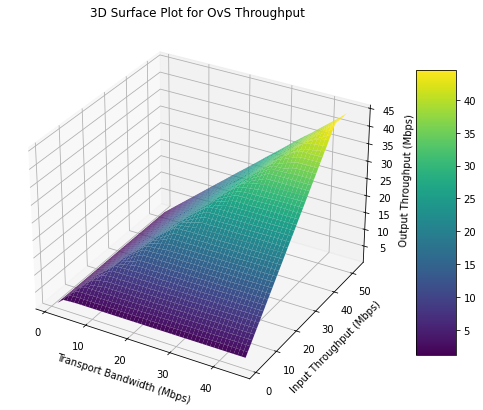

In [9]:
# Plot the OvS output throughput
ovs_data_gen.create_3d_plot()

<div style="font-family: Arial, sans-serif; color: #333; line-height: 1.6; max-width: 600px;">
  <h3 style="color: #4CAF50; border-bottom: 2px solid #4CAF50; padding-bottom: 5px; text-align: left;">Does the 3D Plot Show Expected Behavior?</h3>
  <p style="font-size: 1.1em; margin-top: 15px; text-align: left;">
    The 3D plot illustrates the relationship between resource allocation, input throughput, and output throughput for the <strong>OvS VNF</strong>. Key observations include:
  </p>
  <ul style="font-size: 1.1em; padding-left: 20px; margin-top: 10px; text-align: left;">
    <li><strong>Positive Correlation:</strong> A clear positive correlation is visible between resource allocation and output throughput, indicating that as resource allocation increases, output throughput also rises.</li>
    <li><strong>Expected Behavior:</strong> This positive relationship aligns with the anticipated behavior for the OvS VNF, where increased resources lead to improved throughput.</li>
  </ul>
</div>


<div style="display: inline-block;">
    <h2 style="font-family: 'Courier New', Courier, monospace; font-size: 1.5em; color: #f0f6fc; background-color: #2d333b; border-left: 4px solid #3F51B5; padding: 8px 15px; border-radius: 4px; margin-top: 20px; box-shadow: 0 1px 3px rgba(0, 0, 0, 0.1);">
        3d. Investigating packet loss and delay
    </h2>
</div>


In [20]:
# Create sliders for input throughput and resource allocation
input_throughput_slider = widgets.SelectionSlider(
    options=list(range(5, 55, 5)),  # range from 5 to 50 Mbps in steps of 5
    description='Input Throughput (Mbps):',
    continuous_update=True,
    style={'description_width': '200px'},
    layout=widgets.Layout(width='50%', padding='10px 0px')
)

resource_allocation_slider = widgets.SelectionSlider(
    options=sorted(ran_data_gen.train_input['res'].unique().tolist()), 
    description='Resource Allocation (millicores):',
    continuous_update=True,
    style={'description_width': '200px'},
    layout=widgets.Layout(width='50%', padding='10px 0px')
)

# Create labels for metrics
metric_labels = ["Input Throughput", "Resource Allocation", "Output Throughput", "Delay", "Packet Loss"]
metric_units = ["Mbps", "millicores", "Mbps", "ms", "%"]

output_values = {
    "Output Throughput": widgets.Label(""),
    "Delay": widgets.Label(""),
    "Packet Loss": widgets.Label("")
}

# Function to fetch and update plot data from ran_data_gen
def update_plot(input_throughput, resource_allocation):
    # Retrieve data sample based on current slider values
    data_sample = ran_data_gen.get_nearest_neighbor(input_throughput, resource_allocation)

    # Check if valid data is returned
    if data_sample:
        # Retrieve and display actual metric values from data_sample
        output_throughput = data_sample.get("output_throughput", 0)
        delay = data_sample.get("time_in_sys", 0)
        packet_loss = data_sample.get("packet_loss", 0)
        
        # Update metric values
        output_values["Output Throughput"].value = f"{output_throughput:.1f} Mbps"
        output_values["Delay"].value = f"{delay:.1f} ms"
        output_values["Packet Loss"].value = f"{packet_loss:.1f} %"

        # Normalize values for plotting
        normalized_values = [
            input_throughput / 50,
            resource_allocation / 2500,
            output_throughput / 50,
            delay / 100,
            packet_loss
        ]
    else:
        # If no data, reset output values to "No data"
        output_values["Output Throughput"].value = "No data"
        output_values["Delay"].value = "No data"
        output_values["Packet Loss"].value = "No data"
        normalized_values = [0, 0, 0, 0, 0]

    # Update the Plotly plot
    fig.data[0].y = normalized_values
    fig.update_layout(title="Metrics Visualization")

# Create an initial Plotly bar chart
fig = go.FigureWidget(
    data=[go.Bar(x=metric_labels, y=[0, 0, 0, 0, 0], marker_color='skyblue')],
    layout=go.Layout(
        title="Metrics Visualization",
        xaxis=dict(title="Metrics"),
        yaxis=dict(title="Normalized Value", range=[0, 1])
    )
)

# Define an update function for widget interaction
def on_slider_change(change):
    update_plot(input_throughput_slider.value, resource_allocation_slider.value)

# Attach update function to sliders
input_throughput_slider.observe(on_slider_change, names='value')
resource_allocation_slider.observe(on_slider_change, names='value')

# Display widgets and plot
display(input_throughput_slider, resource_allocation_slider)

# Display metric labels and values
for label, widget in output_values.items():
    display(widgets.HBox([widgets.Label(f"{label}:", layout=widgets.Layout(width='150px')), widget]))

display(fig)

# Initialize with default values
update_plot(input_throughput_slider.value, resource_allocation_slider.value)


SelectionSlider(description='Input Throughput (Mbps):', layout=Layout(padding='10px 0px', width='50%'), option…

SelectionSlider(description='Resource Allocation (millicores):', layout=Layout(padding='10px 0px', width='50%'…

FigureWidget({
    'data': [{'marker': {'color': 'skyblue'},
              'type': 'bar',
              'uid': 'b1d59c52-1351-4e88-a4b7-7ac366884c16',
              'x': [Input Throughput, Resource Allocation, Output Throughput,
                    Delay, Packet Loss],
              'y': [0, 0, 0, 0, 0]}],
    'layout': {'template': '...',
               'title': {'text': 'Metrics Visualization'},
               'xaxis': {'title': {'text': 'Metrics'}},
               'yaxis': {'range': [0, 1], 'title': {'text': 'Normalized Value'}}}
})

<div style="font-family: Arial, sans-serif; color: #222; line-height: 1.6; max-width: 700px; margin: auto; padding: 20px; border: 1px solid #444; border-radius: 8px; background-color: #eaeaea; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);">
  <h2 style="color: #ffffff; background-color: #333333; padding: 10px; border-radius: 4px; margin-bottom: 20px; text-align: center;">Exercise: Explore the Dataset</h2>
  
  <p style="font-size: 1.1em; margin-top: 10px;">
    Take a few minutes to play with the widget above. Once familiar with it, try answering the following questions:
  </p>
  
  <h3 style="color: #ff9800; margin-bottom: 10px;">Questions to Explore</h3>
  <ol style="font-size: 1.1em; margin-left: 25px; margin-bottom: 20px;">
    <li>What is the correlation between the <strong>resource allocation</strong> and the <strong>delay</strong>?</li>
    <li>What is the minimum resource allocation required to support:
      <ul style="margin-left: 25px;">
        <li>an input throughput of <strong>40 Mbps</strong> with <strong>0% packet loss</strong>?</li>
        <li>an input throughput of <strong>20 Mbps</strong> with <strong>0% packet loss</strong>?</li>
      </ul>
    </li>
    <li>What is the maximum input throughput that can be supported with <strong>1000 millicores</strong> of resource allocation while maintaining:
      <ul style="margin-left: 25px;">
        <li><strong>0% packet loss</strong>?</li>
        <li><strong>10% packet loss</strong>?</li>
      </ul>
    </li>
  </ol>
  
  <h4 style="color: #333333; margin-top: 20px; border-bottom: 1px solid #999; padding-bottom: 5px;">Hint:</h4>
  <p style="font-size: 1.05em; margin-bottom: 20px;">Use methods like <code>.describe()</code>, <code>.min()</code>, <code>.max()</code>, and <code>.mean()</code> on specific columns or the entire dataset to gather insights.</p>
  
  <h4 style="color: #333333; margin-top: 10px; border-bottom: 1px solid #999; padding-bottom: 5px;">Examples:</h4>
  <ul style="font-size: 1.05em; margin-left: 25px;">
    <li><code>upf_output_data.time_in_sys.mean()</code> – Calculate the mean delay for the UPF.</li>
    <li><code>upf_input_data.throughput.min()</code> – Get the minimum input throughput for the UPF.</li>
    <li><code>ran_output_data.throughput.mean()</code> – Calculate the mean throughput for the RAN.</li>
  </ul>
</div>


<center>Double click here to reveal the solution.</center>

<!-- 
Q1. The correlation between the resource allocation and the output throughput is positive, meaning that as the resource allocation increases, the output throughput also increases.

Q2. The correlation between the resource allocation and the packet delay is negative, meaning that as the resource allocation increases, the packet delay decreases.

Q3. The minimum resource allocation required to support an input throughput of 40 Mbps with 0% packet loss is 1500 millicores. The minimum resource allocation required to support an input throughput of 20 Mbps with 0% packet loss is 1000 millicores.

Q4. The maximum input throughput that can be supported with 1000 millicores of resource allocation while maintaining 0% packet loss is 20 Mbps. The maximum input throughput that can be supported with 1000 millicores of resource allocation while maintaining 10% packet loss is 25 Mbps.
 -->

<div style="font-family: 'Courier New', Courier, monospace; font-size: 1.8em; color: #f6f8fa; background-color: #24292e; border: 2px solid #444d56; border-radius: 6px; padding: 10px 20px; margin-top: 20px; box-shadow: 0 2px 5px rgba(0, 0, 0, 0.1);">
    <span style="font-weight: 600; font-size: 1.1em; letter-spacing: 0.5px; color: #f0f6fc;">4. Next Steps</span>
</div>


<div style="font-family: Arial, sans-serif; color: #333; line-height: 1.6; max-width: 600px;">
  <h3 style="color: #4CAF50; border-bottom: 2px solid #4CAF50; padding-bottom: 5px; text-align: left;">Why Do We Need a VNF Model?</h3>
  <p style="font-size: 1.1em; margin-top: 15px; text-align: left;">
    The dataset currently includes output features for only a limited set of input values. To address this, we need a <strong>VNF model</strong> to fill in the gaps and predict outputs for the full range of input conditions.
  </p>
  <p style="font-size: 1.1em; margin-top: 15px; text-align: left;">
    In the next notebook, we’ll explore how to train a VNF model using this dataset and demonstrate how multiple VNF models can be combined to create an end-to-end network slice model.
  </p>
</div>
